In [3]:
# Import packages
import warnings
# warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches
import seaborn as sns
sns.set_style("ticks")
sns.set_palette("tab10")
colors = sns.color_palette("bright")

import random as rnd
import numpy as np
rnd.seed(0)
np.random.seed(0)

import scipy.stats as stats
import bayes_logistic
from pypolyagamma import PyPolyaGamma

from utils import *

In [15]:
def f_0(x):
    return np.exp(-(x+5)**2/(2*2))

def f_j(x, beta):
    return f_0(x)**beta * f_n.pdf(x)**(1-beta)

# proposal distribution: 1/Z*f_n
f_n = stats.norm(0, 1)
p_n = stats.norm(0, 1)

In [11]:
def T(x, f, n_steps=10):
    """
    Transition distribution: T(x'|x) using n-steps Metropolis sampler
    """
    for t in range(n_steps):
        # Proposal
        x_prime = x + np.random.randn()

        # Acceptance prob
        a = f(x_prime) / f(x)

        if np.random.rand() < a:
            x = x_prime

    return x

In [26]:
x = np.arange(-10, 5, 0.1)

n_inter = 50  # num of intermediate dists
betas = np.linspace(0, 1, n_inter)

# Sampling
n_samples = 1000
samples = np.zeros(n_samples)
weights = np.zeros(n_samples)
samples_all = np.zeros(shape=(n_samples, n_inter+1))

for t in range(n_samples):
    # Sample initial point from q(x)
    x = p_n.rvs()
    w = 1

    for n in range(1, len(betas)):
        # Transition
        x = T(x, lambda x: f_j(x, betas[n]), n_steps=5)

        # Compute weight in log space (log-sum):
        # w *= f_{n-1}(x_{n-1}) / f_n(x_{n-1})
        w += np.log(f_j(x, betas[n])) - np.log(f_j(x, betas[n-1]))
        samples_all[t, n] = x

    samples_all[t, n+1] = x
    samples[t] = x
    weights[t] = np.exp(w)  # Transform back using exp

In [ ]:
print

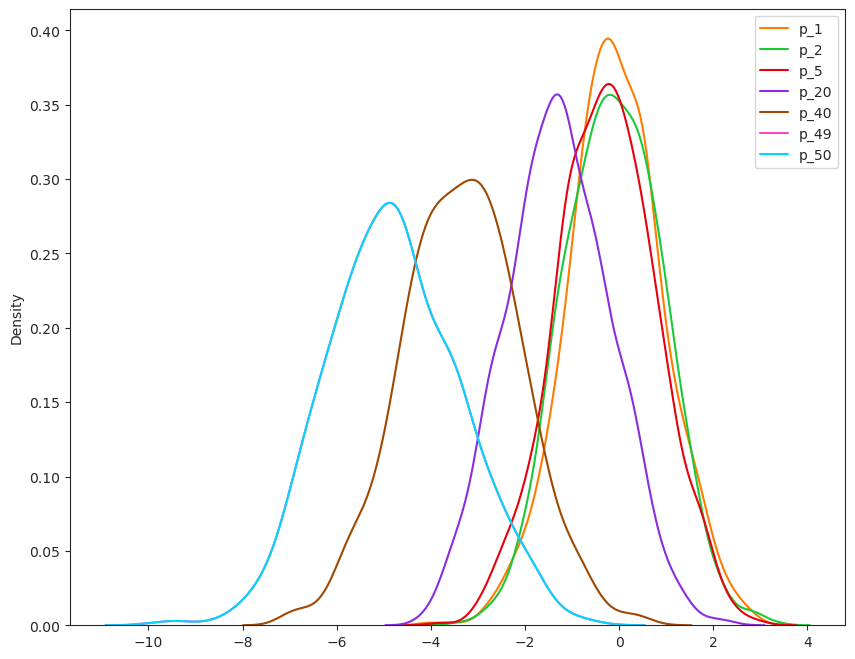

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10,8))
axes = [axes]
iter_idxes = [1, 2, 5, 20, 40, 49] 

for i in range(len(iter_idxes)):
    idx = iter_idxes[i]
    sns.kdeplot(samples_all[:,idx], label=f"p_{idx}", 
                fill=False, color=colors[i+1], ax=axes[0])
    
sns.kdeplot(samples_all[:,50], label="p_50", fill=False, color=colors[-1], ax=axes[0])
    
axes[0].legend(loc="upper right")
plt.show()